In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from data_loader import load_veterans_ds, load_cancer_ds, load_aids_ds, load_nhanes_ds # datasets
from data_loader import prepare_veterans_ds, prepare_cancer_ds, \
                        prepare_aids_ds, prepare_nhanes_ds # prepare funcs
from sksurv.linear_model.coxph import BreslowEstimator
matplotlib_style = 'fivethirtyeight'
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
from sklearn.model_selection import train_test_split
import joblib

curr_dir = os.getcwd()
root_dir = Path(curr_dir).absolute().parent
model = joblib.load(f'{root_dir}/models/cox.joblib')

In [10]:
# Load data
X_train, X_valid, X_test, y_train, y_valid, y_test = load_veterans_ds()
t_train, t_valid, t_test, e_train, e_valid, e_test  = prepare_veterans_ds(y_train, y_valid, y_test)

iteritems is deprecated and will be removed in a future version. Use .items instead.
iteritems is deprecated and will be removed in a future version. Use .items instead.


In [11]:
# Predict survival and hazard funcs
test_sample = train_test_split(X_test, y_test, e_test, t_test,
                               test_size=5, stratify=e_test, random_state=0)
x_sample, y_sample, event_sample, time_sample = test_sample[1::2]
test_surv_fn = model.predict_survival_function(x_sample, return_array=True)
test_hazard_fn = model.predict_cumulative_hazard_function(x_sample, return_array=True)

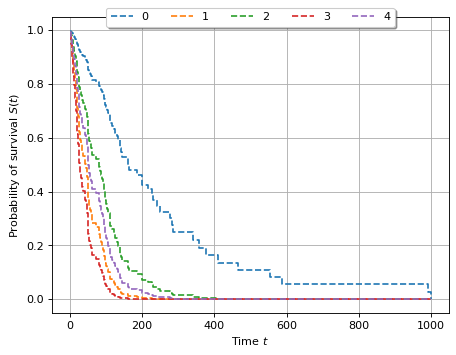

In [12]:
# Plot surv funcs
styles = ('-', '--')
plt.figure(dpi=80)
for i, (surv_fn, lbl) in enumerate(zip(test_surv_fn, event_sample)):
    plt.step(model.event_times_, surv_fn, where="post", label=str(i),
             linestyle=styles[int(lbl)])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=5, fancybox=True, shadow=True)
plt.ylabel("Probability of survival $S(t)$")
plt.xlabel("Time $t$")
plt.grid(True)
plt.show()

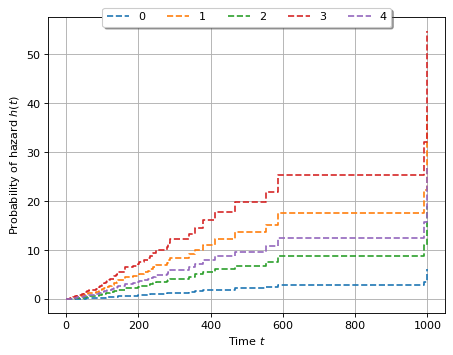

In [13]:
# Plot hazard funcs
styles = ('-', '--')
plt.figure(dpi=80)
for i, (hazard_fn, lbl) in enumerate(zip(test_hazard_fn, event_sample)):
    plt.step(model.event_times_, hazard_fn, where="post", label=str(i),
             linestyle=styles[int(lbl)])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=5, fancybox=True, shadow=True)
plt.ylabel("Probability of hazard $h(t)$")
plt.xlabel("Time $t$")
plt.grid(True)
plt.show()